In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train.head()

,season,date,league_id,league,Team 1,Team2,SPI1,SPI2,proj_score1,proj_score2,...,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,Outcome
0,2019,01/03/19,1979,Chinese Super League,Shandong Luneng,Guizhou Renhe,48.22,37.83,1.75,0.84,...,22.1,1.0,0.0,1.39,0.26,2.05,0.54,1.05,0.00,1
1,2019,01/03/19,1979,Chinese Super League,Shanghai Greenland,Shanghai SIPG,39.81,60.08,1.22,1.89,...,63.4,0.0,4.0,0.57,2.76,0.80,1.50,0.00,3.26,0
2,2019,01/03/19,1979,Chinese Super League,Guangzhou Evergrande,Tianjin Quanujian,65.59,39.99,2.58,0.62,...,28.8,3.0,0.0,0.49,0.45,1.05,0.75,3.15,0.00,1
3,2019,01/03/19,1979,Chinese Super League,Wuhan Zall,Beijing Guoan,32.25,54.82,1.10,1.79,...,58.9,0.0,1.0,1.12,0.97,1.51,0.94,0.00,1.05,0
4,2019,01/03/19,1979,Chinese Super League,Chongqing Lifan,Guangzhou RF,38.24,40.45,1.57,1.24,...,21.3,2.0,2.0,2.77,3.17,1.05,2.08,2.10,2.10,1


In [3]:
train.shape

(7443, 21)

In [4]:
train.isnull().sum()

season            0
date              0
league_id         0
league            0
Team 1            0
Team2             0
SPI1              0
SPI2              0
proj_score1       0
proj_score2       0
importance1    4916
importance2    4916
score1         4800
score2         4800
xg1            5728
xg2            5728
nsxg1          5728
nsxg2          5728
adj_score1     5728
adj_score2     5728
Outcome           0
dtype: int64

In [5]:
train.duplicated().sum()

0

In [6]:
test = pd.read_csv('test.csv')
test.head()

,season,date,league_id,league,Team 1,Team2,SPI1,SPI2,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2021,14/12/21,2411,BPL,Arsenal,West Ham United,79.65,74.06,1.67,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,14/12/21,2411,BPL,Brighton and Hove Albion,Wolverhampton,74.19,71.14,1.35,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,14/12/21,2411,BPL,Norwich City,Aston Villa,60.67,71.45,1.18,1.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,14/12/21,2411,BPL,Leicester City,Tottenham Hotspur,76.88,79.06,1.52,1.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,14/12/21,2411,BPL,Brentford,Manchester United,63.53,85.58,0.95,1.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
test.shape

(4008, 20)

In [8]:
test.isnull().sum()

season            0
date              0
league_id         0
league            0
Team 1            0
Team2             0
SPI1              0
SPI2              0
proj_score1       0
proj_score2       0
importance1    4008
importance2    4008
score1         4008
score2         4008
xg1            4008
xg2            4008
nsxg1          4008
nsxg2          4008
adj_score1     4008
adj_score2     4008
dtype: int64

In [9]:
train['Outcome'].value_counts()

1    5070
0    2373
Name: Outcome, dtype: int64

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7443 entries, 0 to 7442
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       7443 non-null   int64  
 1   date         7443 non-null   object 
 2   league_id    7443 non-null   int64  
 3   league       7443 non-null   object 
 4   Team 1       7443 non-null   object 
 5   Team2        7443 non-null   object 
 6   SPI1         7443 non-null   float64
 7   SPI2         7443 non-null   float64
 8   proj_score1  7443 non-null   float64
 9   proj_score2  7443 non-null   float64
 10  importance1  2527 non-null   float64
 11  importance2  2527 non-null   float64
 12  score1       2643 non-null   float64
 13  score2       2643 non-null   float64
 14  xg1          1715 non-null   float64
 15  xg2          1715 non-null   float64
 16  nsxg1        1715 non-null   float64
 17  nsxg2        1715 non-null   float64
 18  adj_score1   1715 non-null   float64
 19  adj_sc

In [11]:
test.head()

,season,date,league_id,league,Team 1,Team2,SPI1,SPI2,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2021,14/12/21,2411,BPL,Arsenal,West Ham United,79.65,74.06,1.67,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,14/12/21,2411,BPL,Brighton and Hove Albion,Wolverhampton,74.19,71.14,1.35,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,14/12/21,2411,BPL,Norwich City,Aston Villa,60.67,71.45,1.18,1.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,14/12/21,2411,BPL,Leicester City,Tottenham Hotspur,76.88,79.06,1.52,1.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,14/12/21,2411,BPL,Brentford,Manchester United,63.53,85.58,0.95,1.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       4008 non-null   int64  
 1   date         4008 non-null   object 
 2   league_id    4008 non-null   int64  
 3   league       4008 non-null   object 
 4   Team 1       4008 non-null   object 
 5   Team2        4008 non-null   object 
 6   SPI1         4008 non-null   float64
 7   SPI2         4008 non-null   float64
 8   proj_score1  4008 non-null   float64
 9   proj_score2  4008 non-null   float64
 10  importance1  0 non-null      float64
 11  importance2  0 non-null      float64
 12  score1       0 non-null      float64
 13  score2       0 non-null      float64
 14  xg1          0 non-null      float64
 15  xg2          0 non-null      float64
 16  nsxg1        0 non-null      float64
 17  nsxg2        0 non-null      float64
 18  adj_score1   0 non-null      float64
 19  adj_sc

In [13]:
train['season'].value_counts()

2021    6542
2020     661
2019     240
Name: season, dtype: int64

In [14]:
train['league'].nunique()

39

In [15]:
train['Team 1'].nunique()

657

In [16]:
train['Team2'].nunique()

657

In [17]:
newtrain = train.drop(['date', 'league_id', 'importance1', 'importance2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1', 'nsxg2', 'adj_score1', 'adj_score2'], axis = 1)
newtest = test.drop(['date', 'league_id', 'importance1', 'importance2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1', 'nsxg2', 'adj_score1', 'adj_score2'], axis = 1)

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
newtrain['Team 1'] = le.fit_transform(newtrain['Team 1'])
newtrain['Team2'] = le.fit_transform(newtrain['Team2'])
newtrain['league'] = le.fit_transform(newtrain['league'])

In [20]:
newtest['Team 1'] = le.fit_transform(newtest['Team 1'])
newtest['Team2'] = le.fit_transform(newtest['Team2'])
newtest['league'] = le.fit_transform(newtest['league'])

In [21]:
x = newtrain.drop('Outcome', axis = 1)
y = newtrain['Outcome']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
y_pred = rf.fit(x_train, y_train).predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9872397582269979
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       483
           1       0.99      0.99      0.99      1006

    accuracy                           0.99      1489
   macro avg       0.99      0.98      0.99      1489
weighted avg       0.99      0.99      0.99      1489



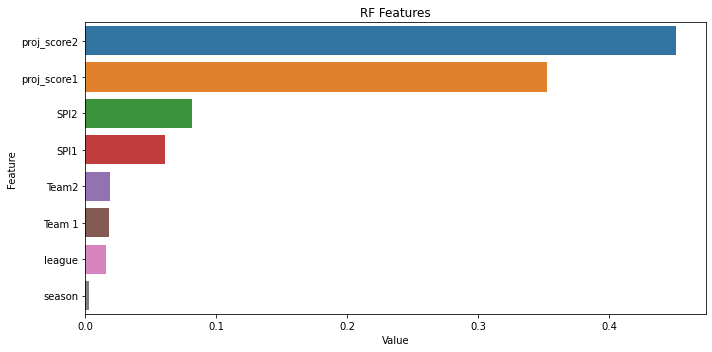

In [25]:
feature_imp = pd.DataFrame(sorted(zip(rf.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(10,5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('RF Features')
plt.tight_layout()
plt.show()

In [32]:
x_train = newtrain.drop(['Outcome', 'SPI1', 'SPI2', 'Team 1', 'Team2'], axis = 1)
y_train = newtrain['Outcome']
x_test = newtest.drop(['SPI1', 'SPI2', 'Team 1', 'Team2'], axis = 1)

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
y_pred = rf.fit(x_train, y_train).predict(x_test)

In [32]:
solution = pd.DataFrame({'Outcome' : y_pred})
solution.to_csv('Solution.csv', index = False)